<a href="https://colab.research.google.com/github/jaleftwi/MAT421_Modules/blob/main/MAT421_ModuleH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module H2** *Ordinary Differential Equations*

---
This will be the last notebook uploaded for the course. Here, we will cover the second half of Module H, continuing our examination of Ordinary Differential Equations. In this section we will cover the following topics:

*   22.4 Numerical Error and Instability
*   22.5 Predictor-Corrector and Runge Kutta Methods
*   22.6 Python ODE Solvers

## **Section 22.4 Numerical Error and Instability**
---
The last section covered various approximation methods such as Explicit Euler's Method, Implicit Euler's Method, and the Trapezoidal Formula. No matter the approximation method, there are always two major concerns regarding the performance of the approximation. 

Firstly, is the approximation accurate? That is to say- can it find a close figure to that of the true solution. How does it increase in accuracy in scale to stepsize "h"? To understand the accuracy of a Ordinary Differential Equation approximation, we utilize the same notation that has been used prior. A function that is of complexity O(h^2) is of (generally) higher accuracy than of another function that is of complexity O(h).

A second issue is that of stability. As the function increases, can it keep in control its error from the true solution from growing? An unstable function will see error fluctuate or increase as the function develops across time. It should be noted that stable functions need to be "stable" for all values of "h".

Both accuracy and stability are properties to be taken in consideration when choosing an approxiamation process and analyzing the ODE.

## **Section 22.5 Predictor-Corrector and Runge Kutta Methods**
---
In the covered methods of estimating solutions to Ordinary Differential Equations, currently we utilize *F(t,S(t))* to find *dS(t)/dt*. Though the method as it is may be effective, we can improve the overall accuracy by incorporating "Predictor-Corrector" methods into the covered equations. In practice, this method observes *F(t,S(t))* at various values, and then takes a weighted average to more clearly approximate *dS(t)/dt*. The two step process begins first with the predictor by estimating the value between tj and tj+1. This is done by the formula "S(tj + h/2) = S(tj) + (h/2)(F(tj,S(tj)))". Then, the corrector step increases the accuracy by using the computation from the predictor. This is done by the expression: "S(tj+1) = S(tj) + (h)(F((tj + h/2), S(tj + h/2)))"

Besides the Euler's Method, another common method used to approximate ODE's is the Runge-Kutta Method. The largest difference between the two methods is while Euler's method only uses the first derivative to estimate the solution, the Runge-Kutta Method uses the second or fourth (or further) derivative based on the order of method that is deemed appropriate for the needed accuracy of the problem. Now, while I say that the Runge-Kutta Method uses higher order derivatives to more accurately estimate the solution, in truth these derivatives are also being estimated through use of the Taylor series. Evaluation using the Runge-Kutta method uses the formula:

S(tj+1) = S(tj) + (h/2)(k1 + k2) 

Of course, this formula is of no use without knowledge of what is "k". This value can be found through the setting the first k1 to the initial evaluation of F(tj,S(tj). Then k2 can be found by evaluating F(tj + h/2, S(tj) + (h/2)(k1). This estimation method applies similarly for Runge_Kutta methods of higher order. For reference, the fourth order Runge-Kutta method (which will be relied upon in the next section) is given by: 

S(tj+1) = S(tj) + (h/6)(k1 + 2\*k2 + 2\*k3 + k4) 

Each k is a seperate point upon which the approximation is performed- which is similar to the second order method with a modified formula for finding sequential "k's" by dividing the stepsize "h" further.



## **Section 22.6 Python ODE Solvers**
---
With how common differential equations are (and not just in the various engineering disciplines), it should come as no surprise that Python comes equiped with various tools that can be used to approximate Ordinary Differential Equations. From thses tools, we will take a moment to focus specifically on "*solve_ivp*" from the subpackage "*scipy.integrate*".

Before using "*solve_ivp*", we have to first set up the function properly so that it can be broken down properly into arguments. Like discussed in the previous section, utilizing *dS(t)/dt = F(t,S(t))* allows for easier management of more complicated order ODE's. To use "*solve_ivp*" for solving ODE's we call the function in the following form: 

```
solve_ivp(f, t_span, s0, method = 'RK45', t_eval = None)
```
Interpreting the arguments of "*solve_ivp*": the first argument "f" is the function on the right side of *dS(t)/dt = F(t,S(t))*. The next argument is "t_span" which is given as a range (t0, tf). This is the specified range that an integral will be estimated upon, meaning this range is the range of the approximation being made. The function should begin approximation at "t0" with "tf" being the end of the range of approximation. After "t_span" is the initial state "s0". It should follow that S(t0) = s0. Going to the next argument, here we assign a selection to "method". While Python supports many other methods for approximation (see documentation for further details), we will use the Runge-Kutta method of order (4)5 as a default (Thus 'RK45'). Finally, the last argument is "t_eval", which is the t value within t_span in which the solution will be stored. In our use, we will assign "t_eval" to "None".

The code below will demonstrate the use of "*solve_ivp*":


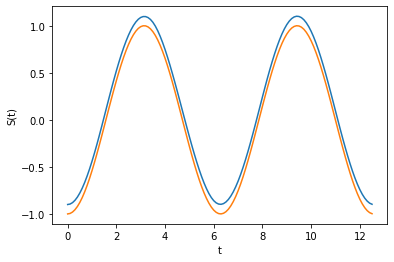

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy.integrate import solve_ivp

F = lambda t, s: 1*np.sin(t)
t_eval = np.arange(0, 4*np.pi, 0.1)     
# While 'None' can be used, for smaller stepsize an alternative can be used to compute 'n' points of sol

sol = solve_ivp(F, [0, 4*np.pi], [-1+0.1], method = 'RK45', t_eval = t_eval)  
# Note the initial condition s0 = -1 is offset by 0.1 to illustrate the difference in approximation

plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, -1*np.cos(sol.t))
plt.xlabel('t')
plt.ylabel('S(t)')
plt.show()

Notice that in the example above: F is the function, [0, 4\*np.pi] is t\_span, the initial condition s0 is (-1+0.1) (0.1 is added only for graphing distinction), method is \'RK45\', and t\_eval is np.arange(0, 4\*np.pi, 0.1) (this is chosen instead of none to create more points in graphing *dS(t)/dt*). Together the arguments allow for the fair approximation of the ordinary differential equation.

***Concluding Notes:*** This is the end of the online notebook homework assignments for MAT421. This has been a fascinating experience, and I am grateful for the opportunity to be able to reteach what I have been learning- as it has helped reinforce what I have learned in class. I understand that these section have been of mixed quality, and there are certain things I think I would do over again if I started from the the top. From missing headers to better examples, I think there is still room for improvement on these notebook pages. Still, it has been enlightening, so I am still grateful for the outcome. - Jeremy